In [102]:
#import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras


In [103]:
#prepare data for model
df_s = pd.read_csv("daily.csv")

In [104]:
#define input and output
X = df_s.loc[:,['Precip (in)', 
#                'Sol Rad (Ly/day)', 
                'Max Vap Pres (mBars)','Avg Air Temp (F)',
                'Avg Rel Hum (%)','Dew Point (F)','Avg Wind Speed (mph)','Avg Soil Temp (F)']]
y = df_s.loc[:,'ETo (in)']

X_train, X_test,Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=100)#set test size

In [105]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape) #y is 1d data

(8938, 7) (8938,)
(2235, 7) (2235,)


Random Forest Regressor

In [106]:
params_rfr = {'n_estimators':1000, #number of trees
              'criterion':'squared_error', #use squared_error instand of mse as criterion bc its removed in the lastest version
              #'ccp_alpha':0.001,
              'max_depth': 10, #number of levels in each tree
              #'min_samples_leaf':1,
              #'min_samples_split':5,
              'bootstrap':True, #set bootstrap as true
              'max_features':None}



In [107]:
model = RandomForestRegressor(**params_rfr)

In [108]:
%%time
model.fit(X_train, Y_train)

CPU times: user 24 s, sys: 276 ms, total: 24.2 s
Wall time: 24.6 s


RandomForestRegressor(max_depth=10, max_features=None, n_estimators=1000)

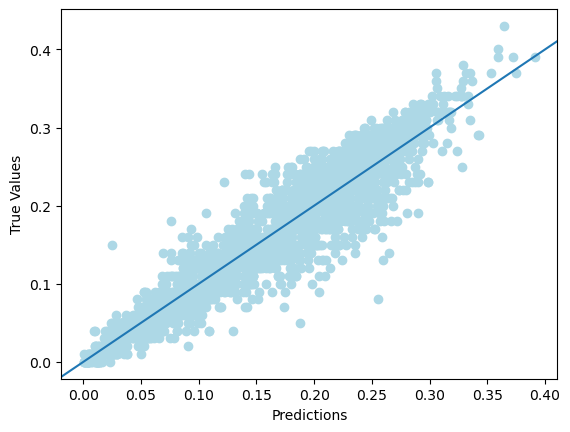

In [109]:

y_hat = model.predict(X_test) #yhat is y prediction

plt.scatter(y_hat, Y_test, color = 'lightblue')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-1,1],[-1,1])


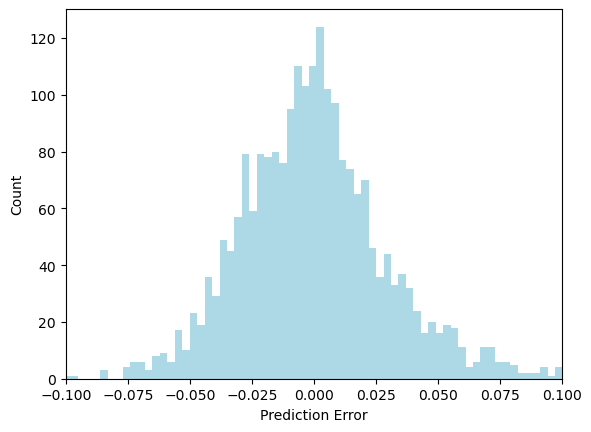

In [110]:
#histogram
error = y_hat - Y_test
plt.hist(error, bins = 100, color = 'lightblue')
plt.xlim(-0.1, 0.1)
plt.xlabel("Prediction Error")
plt.ylabel("Count")

plt.show()

In [111]:
#MSE
MSE = mse(Y_test, y_hat)
print(f'the MSE of RFR model is {MSE}')

the MSE of RFR model is 0.0009027538219015674


In [112]:
#RMSE
RMSE = np.sqrt(MSE)
print(f'the RMSE of RFR model is {RMSE}')

the RMSE of RFR model is 0.030045861976344887


In [113]:
#MAE
MAE = mae(Y_test, y_hat)
print(f'the MAE of RFR model is {MAE}')

the MAE of RFR model is 0.022701718140987495


In [114]:
#R2
R2 = r2_score(Y_test, y_hat)
print(f'the R2 score of RFR model is {R2}')

the R2 score of RFR model is 0.8935200516350392


In [115]:
#training performance
format(model.score(X_train, Y_train))

'0.9371213548084866'

In [116]:
#testing performance
format(model.score(X_test, Y_test))

'0.8935200516350392'

XGBRegressor

In [117]:
params_xgb = {'objective': 'reg:squarederror',
              #'base_score': 0.5,     #chosen as median of validation set
              'n_estimators': 2000,  #number of trees
              #'learning_rate': 0.01, 
              'max_depth': 15,       #number of levels in each tree
              #'subsample': 1,
              #'colsample_bytree': 0.8,
              # REGULARIZATION  alpha (L2) and lambda (L1)
              'reg_alpha': 0,
              'reg_lambda': 1,}

In [118]:
model2 = XGBRegressor(**params_xgb)

In [119]:
%%time
model2.fit(X_train, Y_train)

/Users/qinhuang/opt/anaconda3/envs/keras/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 15.1 s, sys: 1.78 s, total: 16.9 s
Wall time: 2.92 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

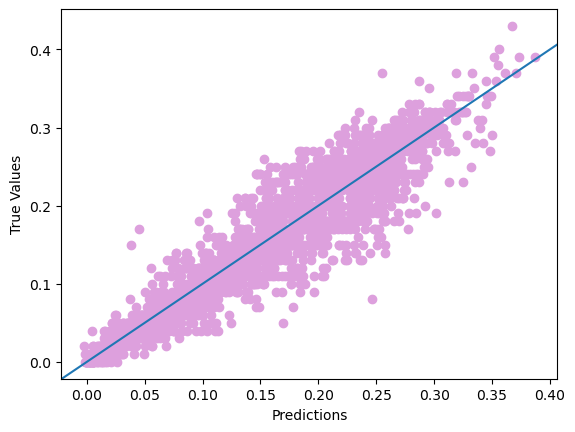

In [120]:
#plot for model2
y_hat2 = model2.predict(X_test) 

plt.scatter(y_hat2, Y_test, color = 'plum')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-1,1],[-1,1])


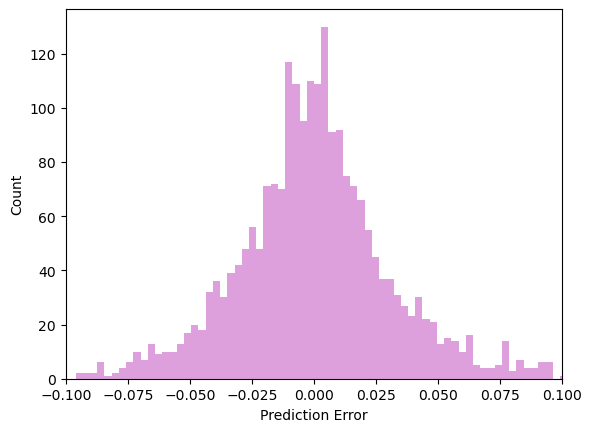

In [121]:
#histogram for model2
error = y_hat2 - Y_test
plt.xlim(-0.1, 0.1)
plt.hist(error, bins = 100, color = 'plum')
plt.xlabel("Prediction Error")
plt.ylabel("Count")

plt.show()

In [122]:
#MSE
MSE2 = mse(Y_test, y_hat2)
print(f'the MSE of XGB model is {MSE2}')

the MSE of XGB model is 0.0010115469747823819


In [123]:
#RMSE
RMSE2 = np.sqrt(MSE2)
print(f'the RMSE of XGB model is {RMSE2}')

the RMSE of XGB model is 0.03180482628127973


In [124]:
#MAE
MAE2 = mae(Y_test, y_hat2)
print(f'the MAE of XGB model is {MAE2}')

the MAE of XGB model is 0.023411191702719703


In [125]:
#R2
R2_2 = r2_score(Y_test, y_hat2)
print(f'the R2 score of XGB model is {R2_2}')

the R2 score of XGB model is 0.8806878829749175


In [126]:
#training performance
format(model2.score(X_train, Y_train))


'0.9997575960931324'

In [127]:
#testing performance
format(model2.score(X_test, Y_test))

'0.8806878829749175'

In [128]:
def plot_feature_importance(importance, names):
    '''this code is from here: 
    https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    '''
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,
          'feature_importance':feature_importance}
    df_ip = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    df_ip.sort_values(by=['feature_importance'], 
                      ascending=False,
                      inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=df_ip['feature_importance'], 
                y=df_ip['feature_names'],
                palette='Pastel1',
               )
    
    #Add chart labels
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    
    

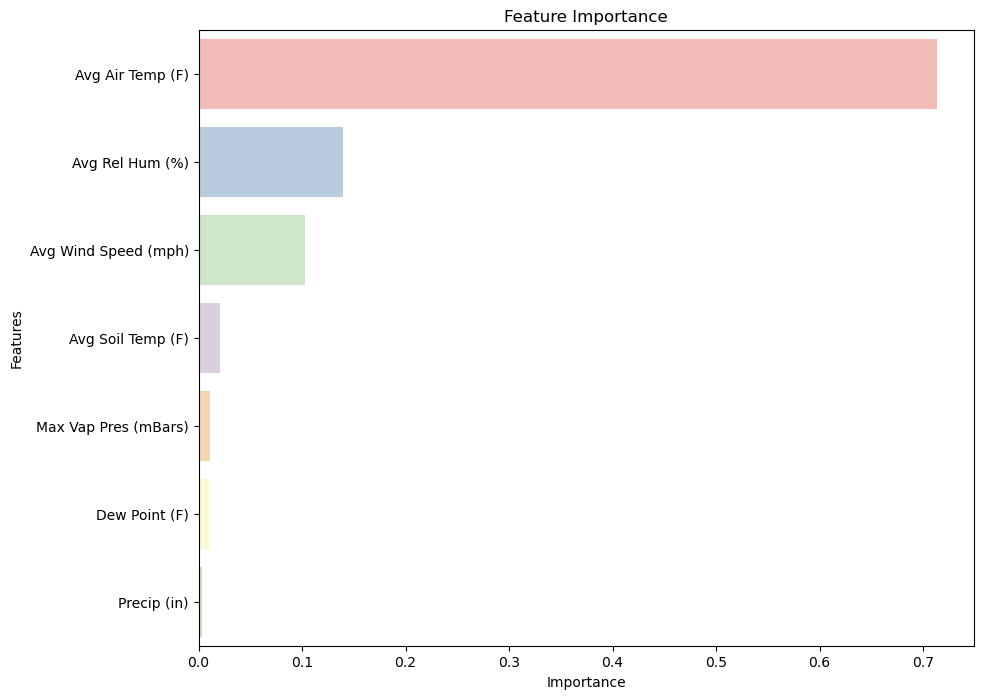

In [129]:
#plot feature importance
plot_feature_importance(model.feature_importances_, X.columns)


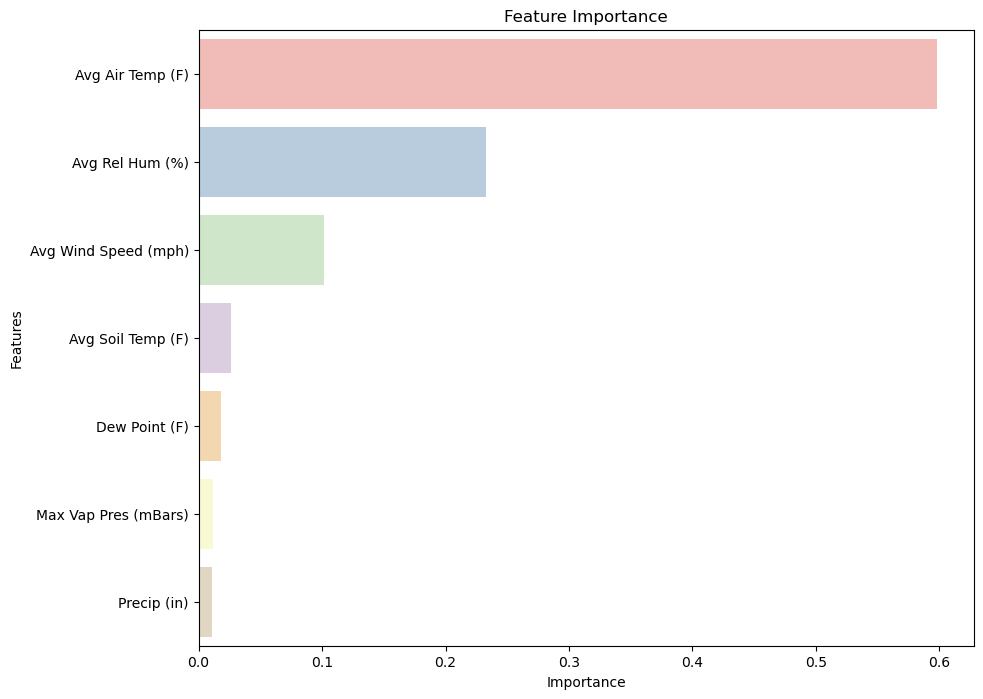

In [130]:
plot_feature_importance(model2.feature_importances_, X.columns)

Neural Network

In [131]:
model3 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, #activation=tf.keras.activations.linear,
                       input_shape=(X_train.shape[1],),
                       name='hidden_layer_1',),
    #keras.layers.Dense(128, activation=tf.nn.relu,
    #                   name='hidden_layer_2',),
    #keras.layers.Dense(4, activation=tf.nn.relu,
    #                   name='hidden_layer_3',),
    #keras.layers.Dense(32, activation=tf.nn.relu,
    #                   name='hidden_layer_4',),
    #keras.layers.Dense(16, activation=tf.nn.relu,
    #                   input_shape=(16,),
    #                   name='hidden_layer_2',),
    keras.layers.Dense(1, name='output_layer',)
])

In [132]:

print(X_train.shape,Y_train.shape)

(8938, 7) (8938,)


In [133]:
#Define optimizer asdf

optimizer = tf.keras.optimizers.Adam()

model3.compile(loss='mse',
               optimizer=optimizer,
               metrics=['mae'])

# show a summary of the data
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 256)               2048      
                                                                 
 output_layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [134]:
#Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
#Function to plot how the model is doing during training
#Visualize the model's training progress using the stats stored in the history object. 
#We want to use this data to determine how long to train before the model stops making progress.
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    #plt.ylim([0, 5])

In [135]:
#class PerformancePlotCallback(keras.callbacks.Callback):
#    def __init__(self, X_test, Y_test):
#        self.X_test = X_test
#        self.Y_test = Y_test
        
#    def on_epoch_end(self, epoch, logs=None):
#        print('Evaluating Model...')
#        print('Model Evaluation: ', self.model.evaluate(self.X_test))

In [136]:
#If you train too long, you are prone to over-fitting
#this prevents the model from generalizing to data it has never seen before
#early stopping is one way to go about this
#The patience parameter is the amount of epochs to check for improvement

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

#performance_simple = PerformancePlotCallback(X_test, Y_test)


#Store training stats
history = model3.fit(X_train, Y_train, 
                     epochs=1000,
                     validation_split=0.2, 
                     verbose=1,
                     callbacks=[early_stop]
#                     callbacks=[performance_simple]

                    )



Epoch 1/1000
224/224 [==============================] - 1s 2ms/step - loss: 0.2038 - mae: 0.2261 - val_loss: 0.0229 - val_mae: 0.1340
Epoch 2/1000
224/224 [==============================] - 0s 1ms/step - loss: 0.0075 - mae: 0.0676 - val_loss: 0.0035 - val_mae: 0.0434
Epoch 3/1000
224/224 [==============================] - 0s 988us/step - loss: 0.0085 - mae: 0.0731 - val_loss: 0.0090 - val_mae: 0.0841
Epoch 4/1000
224/224 [==============================] - 0s 987us/step - loss: 0.0138 - mae: 0.0918 - val_loss: 0.0082 - val_mae: 0.0742
Epoch 5/1000
224/224 [==============================] - 0s 985us/step - loss: 0.0114 - mae: 0.0858 - val_loss: 0.0043 - val_mae: 0.0517
Epoch 6/1000
224/224 [==============================] - 0s 987us/step - loss: 0.0092 - mae: 0.0736 - val_loss: 0.0208 - val_mae: 0.1345
Epoch 7/1000
224/224 [==============================] - 0s 1ms/step - loss: 0.0134 - mae: 0.0926 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 8/1000
224/224 [==============================] 

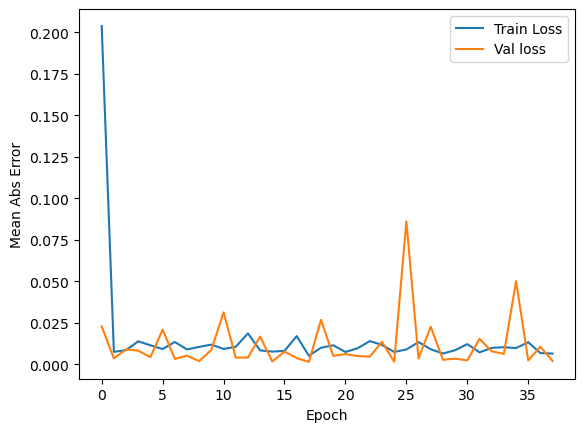

In [137]:
plot_history(history)

70/70 [==============================] - 0s 550us/step


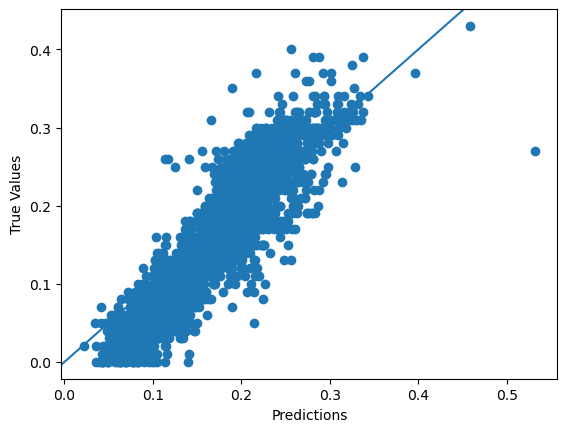

In [138]:
y_hat3 = model3.predict(X_test)

plt.scatter(y_hat3, Y_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-1,1],[-1,1])

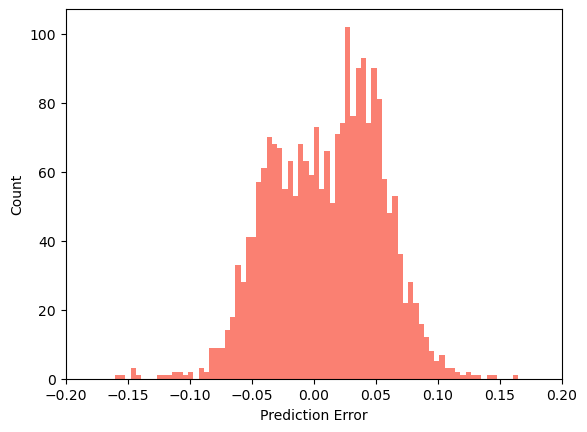

In [139]:
error = y_hat3.reshape(2235,) - Y_test
plt.xlim(-0.2, 0.2)
plt.hist(error, bins = 100, color = 'salmon')
plt.xlabel("Prediction Error")
plt.ylabel("Count")

plt.show()

In [140]:
#MSE
MSE3 = mse(Y_test, y_hat3)
print(f'the MSE of NN model is {MSE3}')

the MSE of NN model is 0.0020326310496397177


In [141]:
#RMSE
RMSE3 = np.sqrt(MSE3)
print(f'the RMSE of NN model is {RMSE3}')

the RMSE of NN model is 0.04508470971005267


In [142]:
#MAE
MAE3 = mae(Y_test, y_hat3)
print(f'the MAE of NN model is {MAE3}')

the MAE of NN model is 0.03758681405750697


In [143]:
#R2
R2_3 = r2_score(Y_test, y_hat3)
print(f'the R2 score of NN model is {R2_3}')

the R2 score of NN model is 0.7602508635690359


Compare 3 models

In [144]:
print('RFR:', 
      'MSE =', {MSE}, 
      'RMSE =', {RMSE}, 
      'MAE =', {MAE}, 
      'R2 =', {R2})

print('XGB:', 
      'MSE =', {MSE2}, 
      'RMSE =', {RMSE2}, 
      'MAE =', {MAE2}, 
      'R2 =', {R2_2})

print('NN:', 
      'MSE =', {MSE3}, 
      'RMSE =', {RMSE3}, 
      'MAE =', {MAE3}, 
      'R2 =', {R2_3})

RFR: MSE = {0.0009027538219015674} RMSE = {0.030045861976344887} MAE = {0.022701718140987495} R2 = {0.8935200516350392}
XGB: MSE = {0.0010115469747823819} RMSE = {0.03180482628127973} MAE = {0.023411191702719703} R2 = {0.8806878829749175}
NN: MSE = {0.0020326310496397177} RMSE = {0.04508470971005267} MAE = {0.03758681405750697} R2 = {0.7602508635690359}


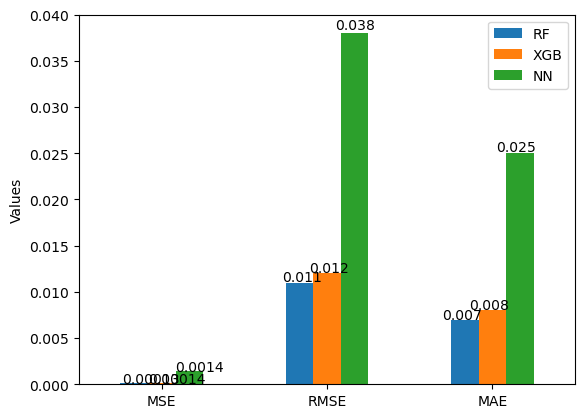

In [145]:
#with r2
#RFR = [0.0001279735189816607, 0.011312538131721842, 0.007112620686826242, 0.9849055042884821]
#XGB = [0.00014483913560460143, 0.012034913194726476, 0.007518301217566752, 0.9829162022843421]
#NN = [0.0008559194052936644, 0.029256100309058015, 0.024653428163587784, 0.8990441780813921]

#index = ['MSE', 'RMSE', 'MAE','R2']

#without r2
RFR = [0.00013, 0.011, 0.007]
XGB = [0.00014, 0.012, 0.008]
NN = [0.0014, 0.038, 0.025]

index = ['MSE', 'RMSE', 'MAE']

dfp = pd.DataFrame({'RF': RFR,
                   'XGB': XGB,
                   'NN': NN}, 
                   index=index)

ax = dfp.plot.bar(rot=0
#                  color = ''
                 )

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() * 0.97, 
                 p.get_height() * 1.01))

plt.ylim(0, 0.04)
plt.ylabel("Values")

plt.show()

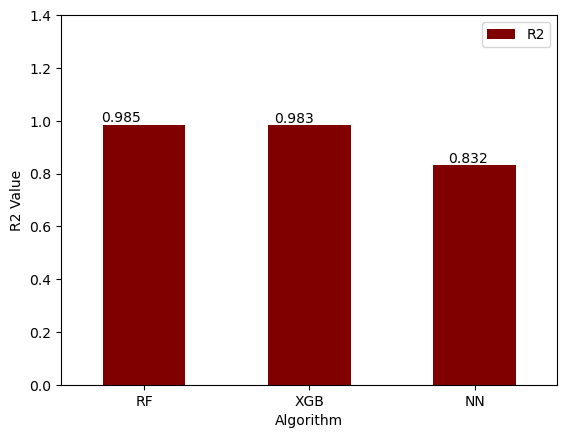

In [146]:
#compare R2

dfo = pd.DataFrame({'Algorithm':['RF', 'XGB', 'NN'], 
                    'R2':[0.985, 
                          0.983, 
                          0.832]})

ax = dfo.plot.bar(x='Algorithm', 
                  y='R2', 
                  rot=0,
                  color = 'maroon')

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() * 1.05, 
                 p.get_height() * 1.01))

plt.ylim(0, 1.4)
plt.ylabel("R2 Value")
plt.show()